In [163]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

In [ ]:
%pwd


In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df

In [ ]:
df.shape

In [ ]:
np.unique(df['exang'])

In [ ]:
cols = ['age','sex','trestbps','chol','fbs','thalach','oldpeak', 'slope', 'ca', 'thal']

In [ ]:
#sns.pairplot(df[cols], size = 2.5)

In [ ]:
x = df[cols].values
y = df['target'].values

In [ ]:
x.shape

In [125]:
model = []
acc = [] 

# Using Perceptron


In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
ppn = Perceptron(max_iter = 40, random_state = 1, eta0=0.1)

In [ ]:
ppn.fit(x, y)

In [ ]:
ppn.score(x, y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1, stratify = y)

In [ ]:
x_test

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:

sc = StandardScaler()


In [ ]:
sc.fit(x_train)
x_train_std = sc.transform(x_train)


In [ ]:
x_test_std = sc.transform(x_test)

In [ ]:
ppn.fit(x_train_std, y_train)


In [ ]:
y_pred = ppn.predict(x_test_std)

In [ ]:
y_pred, y_test

In [112]:
ppn.score(x_test_std, y_test)

0.7912087912087912

In [126]:
model.append('Perceptron')
acc.append(ppn.score(x_test_std, y_test))

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
ppn.predict([[63, 1, 145, 233, 1, 150, 2.3, 0, 0, 1]])

# Using SGDClassifier  

In [ ]:
from sklearn.linear_model import SGDClassifier 

In [ ]:
sgd = SGDClassifier()

In [ ]:
sgd.fit(x,y)

In [ ]:
sgd.score(x, y)


In [ ]:
sgd.fit(x_train_std, y_train)

In [ ]:
y_pred = sgd.predict(x_test_std)

In [ ]:
sgd.score(x_test_std, y_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [127]:
model.append('SGDClassifier')
acc.append(sgd.score(x_test_std, y_test))

# Using KNeighboursClassifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=40)

In [ ]:
knn.fit(x_train_std, y_train)

In [ ]:
knn.score(x_test_std, y_test)

In [ ]:
y_pred = knn.predict(x_test_std)

In [ ]:
accuracy_score(y_test, y_pred)

In [128]:
model.append('KNN')
acc.append(knn.score(x_test_std, y_test))

# Using Logitic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=40, C=0.1)

In [ ]:
lr.fit(x_train_std, y_train)

In [ ]:
lr.score(x_test_std, y_test)

In [ ]:
y_pred = lr.predict(x_test_std)

In [ ]:
accuracy_score(y_test, y_pred)

In [129]:
model.append('Logictic Regression')
acc.append(lr.score(x_test_std, y_test))

# Using LinearDiscriminant Analysis


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=5)

In [ ]:
lda.fit(x_train_std, y_train)

In [ ]:
y_pred = lda.predict(x_test_std)

In [ ]:
lda.score(x_test_std, y_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [130]:
model.append('LDA')
acc.append(lda.score(x_test_std, y_test))

# Using Naive_bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_train_std, y_train)

In [ ]:
y_pred = gnb.predict(x_test_std)

In [ ]:
gnb.score(x_test_std, y_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
gnb.predict([[63, 1, 145, 233, 1, 150, 2.3, 0, 0, 1]])

In [131]:
model.append('GaussianNB')
acc.append(gnb.score(x_test_std, y_test))

# Using DecissionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, max_features=10, random_state=0)

In [ ]:
dt.fit(x_train_std, y_train)

In [ ]:
dt.score(x_test_std, y_test)

In [ ]:
dt.predict([[57,0, 140, 241, 0, 123, 0.2, 1, 0, 3]])

In [132]:
model.append('DTC')
acc.append(dt.score(x_test_std, y_test))

# Using SVM(LinearSVC)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm = LinearSVC(max_iter = 40, random_state=1)

In [ ]:
svm.fit(x_train_std, y_train)

In [ ]:
svm.score(x_test_std, y_test)

In [ ]:
svm.predict([[63, 1, 145, 233, 1, 150, 2.3, 0, 0, 1]])

In [133]:
model.append('SVM')
acc.append(svm.score(x_test_std, y_test))

# Accuracy Comparison

In [157]:
data = {'Model':model, 'Accuracy':acc}

In [182]:
df_plot = pd.DataFrame(data=data)

In [190]:
df_plot

,Model,Accuracy
0,Perceptron,0.791209
1,SGDClassifier,0.714286
2,KNN,0.824176
3,Logictic Regression,0.835165
4,LDA,0.824176
5,GaussianNB,0.802198
6,DTC,0.670330
7,SVM,0.791209


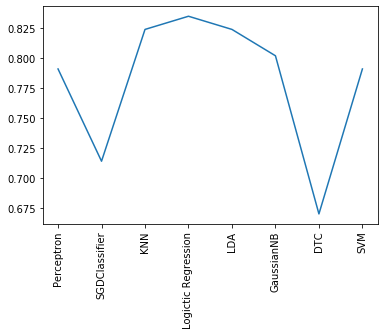

In [202]:
plt.plot(np.arange(8), df_plot['Accuracy'] )
plt.xticks(np.arange(8), model, rotation = 90)
plt.show()